In [233]:
import pandas as pd
import numpy as np
from random import randint
pd.options.mode.chained_assignment = None  # default='warn'

In [35]:
MVC_upper = pd.read_csv('MVC-upper-POC.txt', sep=':')
MVC_lower = pd.read_csv('MVC-lower-POC.txt', sep=':')

In [36]:
def extract_col(dataframe, word):
    ls = []
    for x in dataframe.columns:
        if word in x:
            ls.append(x)
    print ls
    return ls

def del_word(dataframe, words):
    for word in words:
        ls = extract_col(dataframe, word)
        for x in ls:
            del dataframe[x]


## Cleaning MVC_upper and MVC_lower

In [41]:
MVC_upper.head()

,filename,category,subCategory,fiftyU,hundred1U,hundred2U,hundred2O,halfZip,quarterZip,quarter3Zip,...,VerticalStripes,Vests,White,Wide,Wool,Workout,Wraps,Yellow,ZebraPrint,Zipper
filename,,,,,,,,,,,,,,,,,,,,,
p7290291_s2067888_v0,p7290291_s2067888_v0,1,Short Sleeve Tops,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
p7290291_s1289678_v0,p7290291_s1289678_v0,1,Short Sleeve Tops,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
p7290291_s2244328_v0,p7290291_s2244328_v0,1,Short Sleeve Tops,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
p7290291_s1052592_v0,p7290291_s1052592_v0,1,Short Sleeve Tops,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
p7290291_s2067891_v0,p7290291_s2067891_v0,1,Short Sleeve Tops,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [38]:
MVC_lower.head()
del MVC_lower['total']

In [39]:
MVC_upper.index = MVC_upper['filename']
MVC_lower.index = MVC_lower['filename']

In [40]:
# replace category with 1 for uppers and 2 for lowers
MVC_upper['category'] = MVC_upper['category'].replace('Tops',1)
MVC_lower['category'] = MVC_lower['category'].replace('Bottoms',2)

In [23]:
list(MVC_upper.columns)

['filename',
 'category',
 'subCategory',
 'fiftyU',
 'hundred1U',
 'hundred2U',
 'hundred2O',
 'halfZip',
 'quarterZip',
 'quarter3Zip',
 'AnimalPrint',
 'Argyle',
 'Athletic',
 'Banded',
 'Beaded',
 'Beige',
 'Black',
 'Blouses',
 'Blue',
 'Boatneck',
 'Brocade',
 'Bronze',
 'Brown',
 'Burgundy',
 'ButtonUpShirts',
 'Buttondown',
 'Buttons',
 'Camis',
 'Camisoles',
 'Camo',
 'Cardigans',
 'Cashmere',
 'Chains',
 'Chambray',
 'Checkered',
 'CheetahPrint',
 'Chenille',
 'Chevron',
 'Chiffon',
 'Compression',
 'ContrastStitching',
 'Coral',
 'Cotton',
 'Cowl',
 'Crew',
 'Crochet',
 'Cropped',
 'Crystals',
 'Denim',
 'DolmanSleeve',
 'Embossed',
 'Embroidered',
 'Flannel',
 'FleeceJackets',
 'Fleece',
 'FloralPrint',
 'Flowers',
 'Fringe',
 'Geometric',
 'Gold',
 'GraphicPrint',
 'Gray',
 'Green',
 'Halter',
 'HorizontalStripes',
 'Lace',
 'Leather',
 'LeopardPrint',
 'LongSleeves',
 'Mahogany',
 'Mesh',
 'Metallic',
 'MockTurtleneck',
 'Nylon',
 'OffTheShoulder',
 'Olive',
 'Ombre',
 'O

In [42]:
list(MVC_lower.columns)

['filename',
 'category',
 'subCategory',
 'fiftyU',
 'hundred1U',
 'hundred2U',
 'hundred2O',
 'AnimalPrint',
 'Athletic',
 'Beaded',
 'Beige',
 'Black',
 'Blue',
 'BootCut',
 'BoyfriendFit',
 'Brocade',
 'Bronze',
 'Brown',
 'Burgundy',
 'Buttons',
 'Camo',
 'CapriPants',
 'CargoPants',
 'Cashmere',
 'Chains',
 'Chambray',
 'CheetahPrint',
 'Chevron',
 'Chiffon',
 'Chino',
 'Coated',
 'CompressionPants',
 'ContrastStitching',
 'ConvertiblePants',
 'Cotton',
 'Coveralls',
 'Crew',
 'Crochet',
 'Crosstraining',
 'Crystals',
 'Denim',
 'Embossed',
 'Embroidered',
 'Flannel',
 'Flared',
 'FlatFrontPants',
 'Fleece',
 'FloralPrint',
 'Fringe',
 'Geometric',
 'Gold',
 'GraphicPrint',
 'Gray',
 'Green',
 'HighRise',
 'HorizontalStripes',
 'Lace',
 'Leather',
 'Leggings',
 'LeopardPrint',
 'LongSleeves',
 'LooseFit',
 'LoungePants',
 'LowRise',
 'Mahogany',
 'Mesh',
 'Metallic',
 'MidRise',
 'Nylon',
 'Olive',
 'Ombre',
 'OnePieceSwimsuits',
 'Orange',
 'Overalls',
 'Paisley',
 'PajamaBottom

In [43]:
# cleaning MVC_sets

# to delete
MVC_delete = ['filename','subCategory', 'fifty', 'hundred', 'halfZip','quarter']
del_word(MVC_upper, MVC_delete)
del_word(MVC_lower, MVC_delete)


['filename']
['subCategory']
['fiftyU']
['hundred1U', 'hundred2U', 'hundred2O']
['halfZip']
['quarterZip', 'quarter3Zip']
['filename']
['subCategory']
['fiftyU']
['hundred1U', 'hundred2U', 'hundred2O']
[]
[]


## Create Dummy Matrix

In [46]:
upper_ls = list(MVC_upper.columns)[1:]
lower_ls = list(MVC_lower.columns)[1:]

In [50]:
print "upper length: ", len(upper_ls)
print "lower length: ", len(lower_ls)

upper length:  125
lower length:  123


In [78]:
df = pd.DataFrame(np.random.randint(0,100,size=(len(lower_ls), len(upper_ls))), columns= upper_ls)

In [79]:
df.index = lower_ls

In [80]:
df

,AnimalPrint,Argyle,Athletic,Banded,Beaded,Beige,Black,Blouses,Blue,Boatneck,...,VerticalStripes,Vests,White,Wide,Wool,Workout,Wraps,Yellow,ZebraPrint,Zipper
AnimalPrint,93,72,87,53,86,82,89,10,27,65,...,2,23,99,48,80,66,26,61,19,2
Athletic,95,30,56,32,8,34,14,25,8,55,...,55,89,48,13,10,80,49,6,87,60
Beaded,45,38,27,62,39,44,33,22,42,78,...,4,3,96,81,58,17,97,14,75,71
Beige,83,29,37,25,74,49,35,13,65,53,...,90,53,43,46,51,13,90,17,85,86
Black,19,90,53,82,50,27,62,50,34,13,...,79,46,74,84,88,57,95,59,38,50
Blue,79,74,87,61,1,16,40,5,83,11,...,91,77,81,32,8,25,51,99,3,3
BootCut,63,63,96,71,32,66,93,5,58,86,...,22,89,10,23,83,5,20,48,58,96
BoyfriendFit,65,51,62,93,85,40,79,9,50,63,...,5,35,28,82,37,52,36,40,95,98
Brocade,77,39,14,84,13,7,72,1,79,6,...,72,44,84,81,61,18,85,22,72,30
Bronze,20,5,16,19,73,49,30,54,10,73,...,87,72,91,97,56,73,84,17,89,85


In [364]:
def retrieve_top_N(item, df, top_N = 10):
    if item[0] == 1:
        # indicates that input item is upper
        temp_df = df[item[1:]]

    else:
        # indicates that input item is lower
        df['lower'] = df.index
        temp_df = df[df['lower'].isin(item[1:])]
        del temp_df['lower']
        temp_df = temp_df.transpose()        

    temp_df['total'] = temp_df.sum(axis=1)
    
    return temp_df.nlargest(top_N, 'total')

def retrieve_attribute(df, num, upper_lower):
    sample = df[num:num+1]
    attribute_list = [upper_lower]
    for x in sample[1:].columns:
        if sample[x].sum() == 1 and x != 'category':
            attribute_list.append(x)
    print attribute_list
    return sample, attribute_list

## Create a dictionary set for qualities

In [230]:
MVC_upper_dic = {}
MVC_lower_dic = {}

In [231]:
for index, row in MVC_upper.iterrows():
    temp_list = []
    for col, value in row.iteritems():
        if value == 1 and col != 'category':
            temp_list.append(col)
    MVC_upper_dic[index] = temp_list

In [232]:
for index, row in MVC_lower.iterrows():
    temp_list = []
    for col, value in row.iteritems():
        if value == 1 and col != 'category':
            temp_list.append(col)
    MVC_lower_dic[index] = temp_list

## Testing

In [215]:
su1, su1_list = retrieve_attribute(MVC_upper, 35, 1)

[1, 'Boatneck', 'Cotton', 'Pullover', 'TShirts', 'Yellow']


In [216]:
su1_retrieved = retrieve_top_N(su1_list, df, top_N = 10)

In [217]:
su1_retrieved_ls = list(su1_retrieved.index)
su1_retrieved_ls

['Coveralls',
 'PajamaBottoms',
 'PullOn',
 'Plush',
 'PolkaDot',
 'Burgundy',
 'Lace',
 'PinStripes',
 'Sleeveless',
 'Pleated']

In [218]:
matching_dic = {}
for key,value in MVC_upper_dic.iteritems():
    intersect_val = set(su1_retrieved_ls).intersection(value)
    if len(intersect_val) >= 1:
        matching_dic[key] = intersect_val

In [219]:
matching_dic

{'p8572528_s3265337_v0': {'Sleeveless'},
 'p8585871_s3292390_v0': {'Pleated'},
 'p8645658_s3413726_v0': {'Burgundy'},
 'p8570865_s3261798_v0': {'Pleated'},
 'p8472101_s3130902_v0': {'Sleeveless'},
 'p8564056_s3247408_v0': {'Sleeveless'},
 'p8634522_s3403186_v0': {'Pleated'},
 'p8634197_s3402234_v0': {'Burgundy', 'Lace', 'Sleeveless'},
 'p8654673_s3450923_v0': {'Sleeveless'},
 'p8524641_s3479864_v0': {'Pleated'},
 'p8643071_s3424698_v0': {'PinStripes'},
 'p8578286_s3277614_v0': {'Sleeveless'},
 'p8638546_s3414690_v0': {'Sleeveless'},
 'p8530177_s3161352_v0': {'Sleeveless'},
 'p8467903_s3026656_v0': {'Sleeveless'},
 'p7706718_s1285340_v0': {'Lace', 'Sleeveless'},
 'p8512328_s3123413_v0': {'Sleeveless'},
 'p8645163_s3429956_v0': {'Pleated'},
 'p8471159_s3033982_v0': {'Pleated', 'Sleeveless'},
 'p8619672_s3364739_v0': {'Pleated'},
 'p8540636_s3188526_v0': {'Sleeveless'},
 'p8593214_s3305817_v0': {'Pleated'},
 'p8597000_s3437759_v0': {'Pleated', 'Sleeveless'},
 'p8662467_s3467494_v0': {'Ple

In [301]:
x = sorted(matching_dic.values(), key=len)[-1]
print x

set(['Sleeveless', 'Pleated', 'Lace'])


In [306]:
def top_filenames (dic_to_match, list_to_match):
    matching_files = []
    for filename,value in dic_to_match.iteritems():
        if set(value) == set(list_to_match) :
            matching_files.append(filename)
    return matching_files

In [307]:
print top_filenames(matching_dic, x)

['p8554228_s3222444_v0', 'p8513178_s3124613_v0', 'p8554228_s3222445_v0']


In [365]:
def recommendation(filename, upper_lower, cross_matrix, show = False, top_N_rec = 10):
    if upper_lower == 1:
        clothing_input = 'Top'
        clothing_output = 'Bottom'
        att_df = MVC_upper
        att_dic = MVC_lower_dic
    else:
        clothing_input = 'Bottom'
        clothing_output = 'Top'
        att_df = MVC_lower
        att_dic = MVC_upper_dic

    try:
        sample = att_df.loc[filename]
        fn = filename
    except:
        # if filename does not exist... pick a random one
        num = randint(0,len(att_df))
        sample = att_df[num:num+1]
        fn = sample.index[0]
    
    attribute_list = [upper_lower]
    
    for x in sample[1:].columns:
        if sample[x].sum() == 1 and x != 'category':
            attribute_list.append(x)
    print "Filename:", list(sample.index)
    
    path = "/root/mvc/mvc/mvc/" + str(fn) + ".jpg"
    img = mpimg.imread(path)
    plt.figure()
    plt.imshow(img)
    
    
    print ""
    print "Clothing input: ", clothing_input
    print "Attributes for input: ", attribute_list
    print ""

    matched_df = retrieve_top_N(item = attribute_list, df = cross_matrix, top_N = top_N_rec)
    matched_list = list(matched_df.index)
    
    print "Clothing output: ", clothing_output
    print "Recommended attributes: ", matched_list
    print ""
    
    matching_dic = {}
    for key,value in att_dic.iteritems():
        intersect_val = set(matched_list).intersection(value)
        if len(intersect_val) >= 1:
            matching_dic[key] = intersect_val
    
    ls_to_match = sorted(matching_dic.values(), key=len)[-1]
    
    print "Top Matched Attributes: " , ls_to_match
    print ""
    
    rec = top_filenames(matching_dic, ls_to_match)
    print "Recommended Files: ", rec
    
    if show == True:
        for item in rec:
            path = "/root/mvc/mvc/mvc/" + item + ".jpg"
            img = mpimg.imread(path)
            plt.figure()
            plt.imshow(img)
    return rec


Filename: ['p8578517_s3278068_v0']

Clothing input:  Bottom
Attributes for input:  [2, 'Cotton', 'Denim', 'Gray', 'HighRise', 'Polyester', 'StraightLeg']

Clothing output:  Top
Recommended attributes:  ['Athletic', 'Chambray', 'Wool', 'Zipper', 'Pink', 'TattooPrint', 'Yellow', 'Orange', 'Burgundy', 'Tropical']

Top Matched Attributes:  set(['Athletic', 'Pink', 'Zipper'])

Recommended Files:  ['p8201595_s3190593_v0', 'p8265539_s3146114_v0']


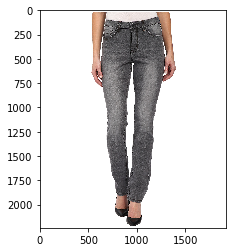

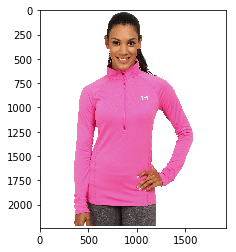

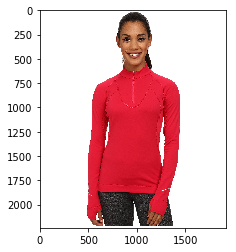

In [366]:
x = recommendation(None, 2, df, show=True)

In [339]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg



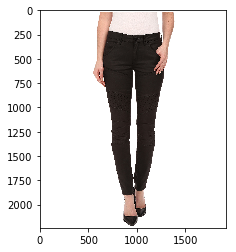

In [363]:
for item in x:
    path = "/root/mvc/mvc/mvc/" + item + ".jpg"
    img = mpimg.imread(path)
    plt.figure()
    plt.imshow(img)
    